In [ ]:
%%HTML
<style>
.rendered_html table{
    width: 80%;
    margin-left:auto; 
    margin-right:auto;
    padding: 20px;
    border: 0px solid black;    
    background-color: #ff;
}
.rendered_html td, .rendered_html th 
{
    vertical-align: top;
    text-align: left;
    font-size: 14px;
    font-face: sans-serif;
}
</style>

<center>
<h1> Analysis and Classification of Periodic Variable Stars</h1>
<h2>Pablo Huijse H. (phuijse at inf dot uach dot cl)</h2>
<h3>Universidad Austral de Chile & Millennium Institute of Astrophysics</h3>
</center>

A tutorial given at the:
- [III LSST-Chile Workshop](https://www.lsst-chile.cl/2017-workshop) @ Santiago, Chile, Dec 13-15
- [School on Systems and Networks (SSN) 2018](http://niclabs.cl/ssn/2018/) @ Valdivia, Chile, Oct 29-31

and running on a jupyterhub at the [NLHPC](http://www.nlhpc.cl/en/) supercomputer *Leftraru*

Thanks to: Juan Carlos Maureira (CMM/UChile) and the organizers

<a href="https://www.space.com/10728-cosmic-visions-paranal-observatory.html">
    <img src="img/intro-paranal.jpg" width="800">
</a>

# Variable stars

- Stars whose brightness change in time
- Different reasons behind this

### Pulsating variables
- Some variable stars pulsate radially
- They expand/heat and contract/cool regularly
- Examples: Cepheid and RR Lyrae

<a href="https://www.youtube.com/watch?v=sXJBrRmHPj8">
    <img src="https://media.giphy.com/media/QP4taxvfVmVEI/giphy.gif" width="300">
</a>

### Eclipsing Binaries

- System of two stars
- The rotational plane is aligned with us
- From our point of view we see brightness decrease with the mutual eclipses

<table>
    <tr><td>
        <a href="http://www.physast.uga.edu/~rls/astro1020/ch16/ovhd.html">
            <img src="img/intro-eb.gif" width="300">
        </a>
    </td>
    <td>
        <a href="https://en.wikipedia.org/wiki/File:Algol_AB_movie_imaged_with_the_CHARA_interferometer_-_labeled.gif">
            <img src="https://media.giphy.com/media/aYb0Ob2GHJ280/giphy.gif" width="300">
        </a>
    </td></tr>
</table>

### Supernovae

- Massive star that runs out of fuel
- Graviational collapse produces massive explosion
- Brightness increases up to 5 billion times our sun

<a href="http://spaceplasma.tumblr.com/post/74724944019/supernova-explosion-artists-impression-one-of">
    <img src="https://media.giphy.com/media/rn79UlSTDfDlS/giphy.gif" width="400">
</a>

# Light curve

- Time series of stellar brightness (or flux) 
- The "apparent" brightness is estimated through **Photometry**
- Variable stars are studied through their light curves

<table><tr><td>
    <img src="img/intro-vista.png" width="300">
</td><td>
    <img src="img/intro-sources.png" width="400">
</td></tr></table>
<table><tr><td>
    <img src="img/intro-sources-time.png" width="600">
</td><td>
    <img src="img/intro-lc.png" width="400">
</td></tr></table>



# Motivation

- Variable stars as distance tracers: **Cosmology**
<table>
    <tr><td>   
        <img src="img/period-luminosity-relation.gif" width="400">
    </td><td>
        <img src="img/intro-milky-way.jpg" width="400">
    </td></tr><tr><td>
        <a href="http://hyperphysics.phy-astr.gsu.edu/hbase/Astro/dareng.html">
            <img src="img/intro-cosmology.gif" width="400">
        </a>
    </td><td>
        <a href="https://owlcation.com/stem/Einstiens-Cosmolgical-Constant-and-the-Expansion-of-the-Universe">
            <img src="img/intro-darke.jpg" width="400">
        </a>
    </td></tr>
</table>

- Variable star analysis and classification: **Astrophysics**
<a href="http://www.atnf.csiro.au/outreach/education/senior/astrophysics/variable_types.html">
    <img src="img/variable-star-classification.gif" width="400">
</a>

- New methods to analyze astronomical data: **Signal processing** and **Data Science**
    - Room for interdisciplinary research
    - Astroinformatics and Astrostatistics


# Part 1: Finding the period of a variable star

In [1]:
import numpy as np
import P4J
%matplotlib notebook
import matplotlib.pylab as plt
from matplotlib import rcParams
rcParams.update({'font.size': 12})
from os import listdir
from os.path import join
import pickle


def fold(mjd, P):
    return np.mod(mjd, P)/P

def plot_folded(ax, phi, mjd, err):
    I = np.argsort(phi)
    ax.errorbar(np.concatenate([phi[I], phi[I]+1.]), 
                np.concatenate([mag[I], mag[I]]),
                np.concatenate([err[I], err[I]]), fmt='.', c='k')
    ax.invert_yaxis(); ax.grid(True)
    

### Light curve data
- Load a light curve from data folder
- Four light curve examples
    - RR Lyrae (Pulsating variable, short period)
    - Long Period Variable (LPV) 
    - Eclipsing binary
    - Non-periodic light curve
- The columns in the files are the 
    - Modified Julian Data (MJD): Corresponds to time 
    - Magnitude: Corresponds to apparent brightness
    - Error: Photometric error estimation of the magnitude

In [ ]:
print([each for each in listdir('data') if each.endswith('.dat')])
# Selected one of the light curves
lc_data = np.loadtxt(join('data', 'lc_eb.dat'))
mjd, mag, err = lc_data.T
N = len(mjd)

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.errorbar(mjd, mag, err, fmt='.', c='k'); ax.invert_yaxis()
ax.set_xlabel('MJD'); ax.set_ylabel('Magnitude')
ax.grid(True);

### Periodogram



In [ ]:
my_per = P4J.periodogram(method='QMIEU') 
my_per.set_data(mjd, mag, err, h_KDE_P=0.25)
my_per.frequency_grid_evaluation(fmin=0.0, fmax=4.0, fresolution=1e-4)
my_per.finetune_best_frequencies(fresolution=1e-5, n_local_optima=10)
freq, per = my_per.get_periodogram()
fbest, pbest  = my_per.get_best_frequencies()

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
ax.plot(freq, per)
ax.set_xlabel('Frequency [1/MJD]')
ax.set_ylabel('Periodogram')
plt.grid()
print("Best period: %f days" %(1.0/fbest[0]))

### Folding the light curve

- Technique used by astronomers to visually inspect periodic variables
- You need a candidate period $P$ to perform the folding
- The time axis is divived in chucks of size $P$ and plotted on top each other
- If the $P$ is close to the true period you will see a nice periodic shape
- Otherwise you see a noisy pattern

In [ ]:
fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
P = 1.0/fbest[0]
plot_folded(ax, np.mod(mjd, P)/P, mag, err)
ax.set_xlabel('Phase = 2 pi modulo(MJD, Period)/Period [rad]')
ax.set_ylabel('Magnitude'); ax.grid(True)

### How significant is this period? 
- The maxima of the periodogram are our test statistic
- Do bootstrap resampling to increase our sample of periodogram maxima"
- Fit a Generalized Extreme Value (GEV) distribution (e.g. Gumbel) to the maxima
- Find $\alpha$ confidence threshold for significance

In [ ]:
from scipy.stats import gumbel_r

pbest_bootstrap = np.zeros(shape=(10, 100))
for i in range(10):
    P = np.random.permutation(len(mjd))
    my_per.set_data(mjd, mag[P], err[P], h_KDE_P=0.25)
    my_per.frequency_grid_evaluation(fmin=0.0, fmax=4.0, fresolution=1e-4)
    my_per.finetune_best_frequencies(fresolution=1e-5, n_local_optima=100)
    _, pbest_bootstrap[i, :] = my_per.get_best_frequencies()

fig, ax = plt.subplots(figsize=(6, 3), tight_layout=True)
param = gumbel_r.fit(pbest_bootstrap.ravel())
_ = ax.hist(pbest_bootstrap.ravel(), bins=20, density=True, alpha=0.2, label='Peaks histogram')
rv = gumbel_r(loc=param[0], scale=param[1])
x = np.linspace(rv.ppf(0.001), rv.ppf(0.999), 100)
plt.plot(x, rv.pdf(x), 'r-', lw=5, alpha=0.6, label='Fitted Gumbel PDF')
plt.xlabel('Periodogram value'); plt.legend();

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(9, 3), tight_layout=True)
ax[0].plot(freq, per)
# Print confidence bars
xmin, xmax = ax[0].get_xlim()
for p_val in [0.999, 0.99, 0.9]:
    ax[0].plot([xmin, xmax], [rv.ppf(p_val), rv.ppf(p_val)], 
               '--', linewidth=4, alpha=0.5, label=str(p_val))
ax[0].legend()
# Print max of periodogram
ymin, ymax = ax[0].get_ylim()
ax[0].set_xlim([0., 4.]); ax[0].set_ylim([ymin, ymax]); ax[0].grid(True)
ax[0].set_xlabel('Frequency [1/MJD]'); ax[0].set_ylabel('Periodogram')
f_fold = fbest[0]; 
ax[0].plot([f_fold, f_fold], [ymin, ymax], '--', linewidth=4, alpha=0.5)
phi = np.mod(mjd, 1.0/f_fold)*f_fold;
plot_folded(ax[1], phi, mag, err)
ax[1].set_xlabel('Phase @ %0.5f [1/d], %0.5f [d]' %(f_fold, 1.0/f_fold))
ax[1].set_ylabel('Magnitude'); 

# Machine Learning

- A paradigm were algorithms **learn** models that map input (data) to a desired response
- Roots in statistics
- Great success in **pattern recognition** problems: Classification, Regression, Prediction
- The user defines the "family" of the model and the **learning rules**
- The user provides **data and targets**
- The user makes sure that the model does not **overfit** the training data
- GOAL: **Generalize** to unseen data

<img src="img/intro-ml.png" width="600">


<a href="https://alykhantejani.github.io/a-brief-introduction-to-gradient-descent/">
    <img src="img/intro-grad.gif" width="600">
</a>

# Neural networks

- Neural networks are parametric models loosely based on our brains
- Interconected networks of simple units called neurons 
- The parameters of the neuron are learnt through solving an optimization problem
- Many different architectures to solve many different problems

<table><tr><td>
    <img src="img/intro-neuron.png" width="300">
</td><td>
    <img src="img/intro-neuron-model.png" width="300">
</td></tr></table>
<a href="http://www.asimovinstitute.org/neural-network-zoo/">
    <img src="img/intro-nns.png" width="600">
</a>

# Part 2: Getting features from our periodic light curves

- We 

Discrimination of RR Lyrae light curves from the VVV survey. 
1. Periodicity detection in light curves using mutual information (P4J) 
- Feature extraction using Gaussian proccesses (scikit-learn)
- Dimensionality reduction using PCA (scikit-learn) and autoencoders (tensorflow)
- Interactive visualization of the reduced feature space using bokeh
- Transductive classification using a positive-unlabeled (PU) random forest

# Featurize periodic light curve

- To train a neural network we need features that represent our data 
- 

Obtain features by fitting a periodic Gaussian process (scikit-learn)

1. Fold the light curve using
$$
\phi = \text{modulo}(\text{MJD}, P)/P,
$$ 
where $P$ is the detected period 
- Fit the folded LC using Gaussian process regression with a periodic kernel
$$
\kappa_P(\Delta \phi) = \exp \left(-2 \sin^2(\pi \Delta \phi)/\sigma_p^2 \right),
$$ 
- Add an additional $\sigma^2$ term to fit the noise (WhiteKernel)
- **Note 1:** It is recommended to remove outliers before fitting
- **Note 2:** Consider [Heteroscedastic GP regression](http://nbviewer.jupyter.org/github/SheffieldML/notebook/blob/master/GPy/heteroscedastic_regression.ipynb) if error bars differ much

In [ ]:
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel
from sklearn.gaussian_process import GaussianProcessRegressor
gpr = GaussianProcessRegressor(kernel=ExpSineSquared(periodicity=1.0, periodicity_bounds=(0.9999, 1.0001)) \
                               + WhiteKernel(), alpha=err**2, normalize_y=True, n_restarts_optimizer=5)
gpr.fit(X=phi[:, np.newaxis], y=mag[:, np.newaxis])
print(gpr.kernel_)

phi_plot = np.linspace(0.0, 1.0, num=40)[:, np.newaxis]
gp_mu, gp_std = gpr.predict(X=phi_plot, return_std=True)

fig, ax = plt.subplots(1, 2, figsize=(9, 3), tight_layout=True)
ax[0].plot(np.hstack((phi_plot[:, 0], phi_plot[:, 0]+1)), np.hstack((gp_mu[:, 0], gp_mu[:, 0])))

ax[0].fill_between(np.hstack((phi_plot[:, 0], phi_plot[:, 0]+1)), 
                 np.hstack((gp_mu[:, 0], gp_mu[:, 0])) - 2* np.hstack((gp_std, gp_std)), 
                 np.hstack((gp_mu[:, 0], gp_mu[:, 0])) + 2* np.hstack((gp_std, gp_std)), alpha=0.5)
plot_folded(ax[0], phi, mag, err)
ax[0].set_xlabel('Phase'); ax[0].set_ylabel('Magnitude')

idx_max = np.argmax(gp_mu); gp_mu = np.roll(gp_mu, -idx_max)
ax[1].scatter(np.arange(40), (gp_mu - np.median(gp_mu))/np.std(gp_mu))
ax[1].invert_yaxis(); plt.grid()
plt.xlabel('Features'); plt.ylabel('Normalized magnitude')

gp_mu_train = gpr.predict(X=(np.mod(mjd, 1.0/fbest[0])*fbest[0])[:, np.newaxis], return_std=False)
w_mean = np.average(mag, weights=1.0/err**2)
w_var = np.average((mag - w_mean)**2, weights=1.0/err**2)
w_mse = np.average((mag - gp_mu_train[:, 0])**2, weights=1.0/err**2)
fit_quality = np.sqrt(w_mse/w_var)
fit_smoothness = np.sqrt(np.average((gp_mu[1:] - gp_mu[:-1])**2))/np.amax([np.sqrt(w_var), np.std(gp_mu)])
# NMSE: Mean squared difference between data and model divided by data variance
# NSFD: Mean squared differences between succesive points from in the model, 
# it measures the smoothness of the fit
print("Normalized Mean Square Error (NMSE): %f\nNormalized Sum of first differences (NSFD) %f" %(fit_quality, fit_smoothness))

# Part 3: Trainining a neural network

1. In this part we will train an [autoencoder](https://docs.google.com/presentation/d/1IJ2n8X4w8pvzNLmpJB-ms6-GDHWthfsJTFuyUqHfXg8/edit?usp=sharing) to visualize the feature space 
- We will use [PyTorch](https://pytorch.org/) to create and train the model
- We have light curves labeled as RR Lyrae and light curves with no label
- Can we find unlabeled light curves that belong to the RR Lyrae class?

In [2]:
import torch
from torch.nn import functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import StratifiedShuffleSplit
from vae import VAE, live_metric_plotter

# Load GP features computed offline
lc_periods = pickle.load(open("data/lc_periods.pkl", "rb"))
data_P = pickle.load(open("data/features_P.pkl", "rb"))
data_U = pickle.load(open("data/features_U.pkl", "rb"))

# Split data intro train and validation sets
data = np.concatenate((data_P, data_U), axis=0)
labels = np.concatenate((np.ones(shape=(len(data_P), 1)), np.zeros(shape=(len(data_U), 1))))
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=0)
train_idx, valid_idx = next(sss.split(data, labels))
train_dataset = TensorDataset(torch.from_numpy(data[train_idx].astype('float32')))
valid_dataset = TensorDataset(torch.from_numpy(data[valid_idx].astype('float32')))

VAE(
  (enc_hidden): Linear(in_features=47, out_features=16, bias=True)
  (enc_mu): Linear(in_features=16, out_features=2, bias=True)
  (enc_logvar): Linear(in_features=16, out_features=2, bias=True)
  (dec_hidden): Linear(in_features=2, out_features=16, bias=True)
  (dec_mu): Linear(in_features=16, out_features=47, bias=True)
  (dec_logvar): Linear(in_features=16, out_features=1, bias=True)
)
Number of trainable parameters: 1700


<IPython.core.display.Javascript object>


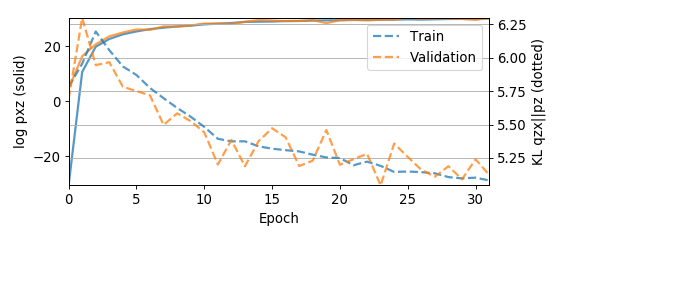

KeyboardInterrupt: 

In [5]:
batch_size_, nepochs, mc_samples = 32, 50, 32
torch.manual_seed(0)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size_, shuffle=True)
valid_loader = DataLoader(dataset=valid_dataset, batch_size=batch_size_, shuffle=False)

model = VAE(n_input=47, n_hidden=16, n_latent=2, importance_sampling=True)
print(model)
model_parameters = filter(lambda p: p.requires_grad, model.parameters())
print("Number of trainable parameters: %d" %(sum([np.prod(p.size()) for p in model_parameters])))

optimizer = torch.optim.Adam(model.parameters(), lr=5e-3)
plotter = live_metric_plotter()
metrics = np.zeros(shape=(nepochs, 2, 2))

for epoch in range(nepochs):
    # Train 
    for x_batch, in train_loader:
        optimizer.zero_grad()        
        dec_mu, dec_logvar, enc_mu, enc_logvar, z = model.forward(x_batch, mc_samples)
        loss, rec_loss, reg_loss = model.ELBO(x_batch.unsqueeze(1), dec_mu, dec_logvar, enc_mu, enc_logvar, z)        
        loss.backward()
        # torch.nn.utils.clip_grad_norm_(model.parameters(), 5.0)        
        optimizer.step()
        metrics[epoch, 0, 0] += rec_loss.detach().numpy()/len(train_dataset)
        metrics[epoch, 0, 1] += reg_loss.detach().numpy()/len(train_dataset)
    # Test
    for x_batch, in valid_loader:
        dec_mu, dec_logvar, enc_mu, enc_logvar, z = model.forward(x_batch, mc_samples)
        loss, rec_loss, reg_loss = model.ELBO(x_batch.unsqueeze(1), dec_mu, dec_logvar, enc_mu, enc_logvar, z)
        metrics[epoch, 1, 0] += rec_loss.detach().numpy()/len(valid_dataset)
        metrics[epoch, 1, 1] += reg_loss.detach().numpy()/len(valid_dataset)
    
    if epoch > 0:
        plotter.update(epoch, metrics)

<IPython.core.display.Javascript object>


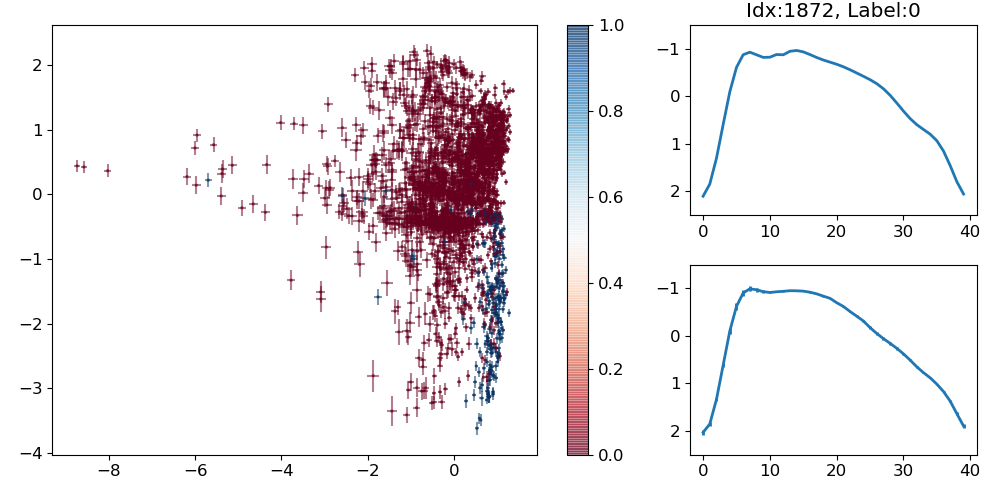

In [10]:
test_dec_mu, test_dec_logvar, test_enc_mu, test_enc_logvar, test_z = model.forward(valid_dataset.tensors[0], k=10)
test_enc_mu, test_enc_sigma = test_enc_mu.detach().numpy(), (test_enc_logvar.detach()*0.5).exp().numpy()
test_dec_mu = test_dec_mu.detach().numpy()

"""
The figure shows the digits in latent space as a dot (mean of the variational posterior) with 
errorbars (standard deviation of the variational posterior). Each point is a distribution!
"""
fig = plt.figure(figsize=(10, 5), dpi=80)
ax_main = plt.subplot2grid((2, 3), (0, 0), colspan=2, rowspan=2)
ax_ori = plt.subplot2grid((2, 3), (0, 2))
ax_rec = plt.subplot2grid((2, 3), (1, 2))
a, b, c = ax_main.errorbar(x=test_enc_mu[:, 0], y=test_enc_mu[:, 1], 
                           xerr=test_enc_sigma[:, 0], yerr=test_enc_sigma[:, 1], 
                           fmt='none', alpha=0.5, zorder=-1)
sc = ax_main.scatter(test_enc_mu[:, 0], test_enc_mu[:, 1], s=2, alpha=0.5, 
                     c=labels[valid_idx, 0], cmap=plt.cm.RdBu)
clb = plt.colorbar(sc, ax=ax_main)
for i in range(2):
    c[i].set_color(clb.to_rgba(labels[valid_idx, 0]))
    
line_ori = ax_ori.plot(np.arange(40), data[valid_idx][0][:40], linewidth=2); 
ax_rec.errorbar(np.arange(40), np.mean(test_dec_mu[0], axis=0)[:40], 
                2*np.std(test_dec_mu[0], axis=0)[:40], linewidth=2); 
for ax in [ax_rec, ax_ori]:
    ax.invert_yaxis();
    ax.set_ylim([2.5, -1.5]); 
    
c_lim, r_lim = ax_main.get_xlim(), ax_main.get_ylim()
plt.tight_layout()

def onclick(event):
    z_closest = [event.xdata, event.ydata]
    print(z_closest)
    idx = np.argmin(np.sum((test_enc_mu - z_closest)**2, axis=1))
    ax_ori.set_title("Idx:%d, Label:%d" %(idx, labels[valid_idx][idx, 0]))
    line_ori[0].set_ydata(data[valid_idx][idx][:40]) 
    ax_rec.cla(); ax_rec.invert_yaxis(); ax_rec.set_ylim([2.5, -1.5]); 
    ax_rec.errorbar(np.arange(40), np.mean(test_dec_mu[idx], axis=0)[:40], 
                    2*np.std(test_dec_mu[idx], axis=0)[:40], linewidth=2); 
    
cid = fig.canvas.mpl_connect('button_press_event', onclick);